In [ ]:
# /bin/python -m pip install ipykernel -U --user --force-reinstall
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vanet_malicious_nodes.csv')

# Clean data
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
print(df)

# Feature selection
selected_features = ['position_x','position_y','speed','direction',
                     'acceleration','signal_strength','trust_score',
                     'sybil_attack_attempts']
X = df[selected_features]
y = df['is_malicious']

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

      node_id  position_x  position_y      speed   direction  acceleration  \
0           1  374.540119  393.635520  11.209225  179.881288      1.379990   
1           2  950.714306  473.435659   9.987363  268.828838     -1.892928   
2           3  731.993942  854.547393   5.284617  202.560041     -0.920162   
3           4  598.658484  340.004386  18.218000   29.988930      0.979684   
4           5  156.018640  869.649685  14.298725   66.808885     -0.107464   
...       ...         ...         ...        ...         ...           ...   
4995     4996  897.397318  857.655988  19.526505  315.733906     -1.035078   
4996     4997  119.381011  897.508835   5.333950   16.853025      1.361798   
4997     4998  327.842838  946.707915   1.537186  109.331449      2.539645   
4998     4999  815.745381  397.487992  20.488848  159.595202      0.823714   
4999     5000  597.312378  217.140404   7.532371   62.015333      2.711031   

      packet_sent  packet_received  packet_drop_ratio    latenc

In [22]:
print(df["is_malicious"])

0       0
1       0
2       0
3       0
4       1
       ..
4995    1
4996    0
4997    0
4998    1
4999    0
Name: is_malicious, Length: 5000, dtype: int64


In [23]:
# Train-test split for ML models
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features
scaler_ml = StandardScaler()
X_train_ml_scaled = scaler_ml.fit_transform(X_train_ml)
X_test_ml_scaled = scaler_ml.transform(X_test_ml)


In [24]:
# Random Forest
rf_model = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
rf_model.fit(X_train_ml, y_train_ml)


# XGBoost
# xgb_model = XGBClassifier(
#     n_estimators=200, learning_rate=0.05, max_depth=10,
#     subsample=0.8, colsample_bytree=0.8,
#     use_label_encoder=False, eval_metric='logloss'
# )
# xgb_model.fit(X_train_ml_scaled, y_train_ml)


# Quick evaluation
print("Random Forest Accuracy:", rf_model.score(X_test_ml, y_test_ml))
# print("XGBoost Accuracy:", xgb_model.score(X_test_ml_scaled, y_test_ml))


Random Forest Accuracy: 0.956


In [25]:
a=[[156.0186, 869.6497, 14.29872,66.80889,-0.10746,-92.9876,0.282821,2]]
y_pred= rf_model.predict(X_test_ml)
y_pred0 =rf_model.predict(a)
print(y_pred0)



print(confusion_matrix(y_test_ml,y_pred))
print(classification_report(y_test_ml , y_pred))

[1]


[[716  43]
 [  1 240]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       759
           1       0.85      1.00      0.92       241

    accuracy                           0.96      1000
   macro avg       0.92      0.97      0.94      1000
weighted avg       0.96      0.96      0.96      1000



/home/user/studio/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Example: train a random forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Save only the random forest model
# with open("rf_model.pkl", "wb") as f:
#     pickle.dump(rf_model, f)

# Later, load it back
with open("rf_model.pkl", "rb") as f:
    loaded_rf = pickle.load(f)

# Use the loaded model
y_pred = loaded_rf.predict(X_test_ml)


In [ ]:
# # Sequence builder
# def build_sequences(X_raw, y_raw, T=20):
#     X_seq, y_seq = [], []
#     for i in range(len(X_raw) - T + 1):
#         X_seq.append(X_raw[i:i+T])
#         y_seq.append(y_raw[i+T-1])
#     return np.array(X_seq), np.array(y_seq)

# X_seq, y_seq = build_sequences(X.values, y, T=20)

# # Scale sequences
# N, T, F = X_seq.shape
# scaler_dl = StandardScaler()
# X_scaled = scaler_dl.fit_transform(X_seq.reshape(-1, F)).reshape(N, T, F)

# # Train-test split for DL
# X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
#     X_scaled, y_seq, test_size=0.2, random_state=42
# )

# print("Train shape:", X_train_dl.shape)
# print("Test shape:", X_test_dl.shape)



Train shape: (3984, 20, 8)
Test shape: (997, 20, 8)


2025-12-20 10:01:49.894658: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/user/studio/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.7412 - loss: 0.5161 - val_accuracy: 0.8245 - val_loss: 0.3360
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8931 - loss: 0.2546 - val_accuracy: 0.8987 - val_loss: 0.2014
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9212 - loss: 0.2004 - val_accuracy: 0.9318 - val_loss: 0.1700
Epoch 4/10
 4/63 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9095 - loss: 0.1694

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9232 - loss: 0.1876 - val_accuracy: 0.9398 - val_loss: 0.1649
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9315 - loss: 0.1769 - val_accuracy: 0.9418 - val_loss: 0.1553
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9350 - loss: 0.1694 - val_accuracy: 0.9388 - val_loss: 0.1548
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9312 - loss: 0.1665 - val_accuracy: 0.9428 - val_loss: 0.1512
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9383 - loss: 0.1588 - val_accuracy: 0.9448 - val_loss: 0.1503
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9357 - loss: 0.1585 - val_accuracy: 0.9418 - val_loss: 0.1489
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9398 - loss: 0.1570 - val_accuracy: 0.9338 - val_loss: 0.1472
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9338 - loss: 0.1472
LSTM Test Accuracy: 0.9338014125823975


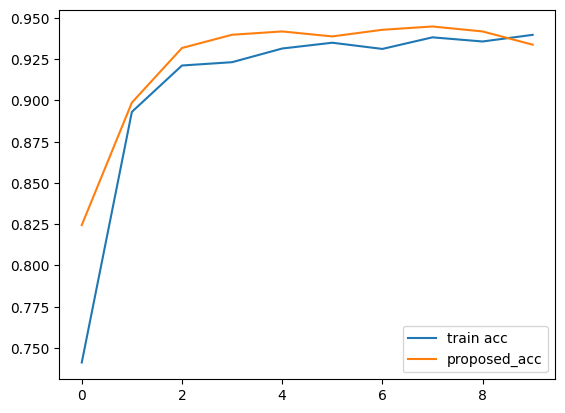

In [ ]:
# lstm_model = Sequential([
#     LSTM(128, input_shape=(T, F)),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(2, activation='softmax')
# ])

# lstm_model.compile(optimizer='adam',
#                    loss='sparse_categorical_crossentropy',
#                    metrics=['accuracy'])

# history = lstm_model.fit(X_train_dl, y_train_dl,
#                          validation_data=(X_test_dl, y_test_dl),
#                          epochs=10, batch_size=64)

# loss, acc = lstm_model.evaluate(X_test_dl, y_test_dl)
# print("LSTM Test Accuracy:", acc)

# # Plot training curve
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='proposed_acc')
# plt.legend()
# plt.show()


In [ ]:
# y_pred = lstm_model.predict(X_test_dl)
# print(classification_report(y_test_dl, y_pred.argmax(axis=1)))


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [ ]:
# sample_seq = X_test_dl[0].reshape(1, T, F)  # one sequence
# y_pred = lstm_model.predict(sample_seq)
# print("Probabilities:", y_pred)
# print("Predicted class:", np.argmax(y_pred))
# print("True class:", y_test_dl[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Probabilities: [[1.0000000e+00 3.0533526e-10]]
Predicted class: 0
True class: 0


In [ ]:
# def ensemble_predict(X_ml, X_dl):

#     rf_pred = rf_model.predict(X_ml)
#     xgb_pred = xgb_model.predict(X_ml)

#     lstm_pred = lstm_model.predict(X_dl).argmax(axis=1)

#     preds = np.vstack([rf_pred, xgb_pred, lstm_pred]).T
#     final_pred = [np.bincount(row).argmax() for row in preds]
#     return np.array(final_pred)


The error occurs because the predictions from your Random Forest and XGBoost models have a different number of samples than the predictions from your LSTM model. This happens because the test sets used for the machine learning models (X_test_ml_scaled) and the deep learning model (X_test_dl) were created independently and thus contain a different number of data points. To fix this, we need to ensure that all models make predictions on the same set of test samples.

The previous error regarding inconsistent array dimensions has been resolved. The code executed successfully, and the warning you see (X does not have valid feature names...) is a common sklearn warning when StandardScaler fitted on a DataFrame with column names is used to transform a NumPy array without them. It generally doesn't affect the scaling calculation itself, but sklearn flags it for best practice.

Now, let's look at the ensemble model's performance:

Confusion Matrix:

True Negatives (0, 0): 703 - The model correctly identified 703 non-malicious nodes.
False Positives (0, 1): 35 - The model incorrectly identified 35 non-malicious nodes as malicious.
False Negatives (1, 0): 0 - The model did not miss any actual malicious nodes, which is excellent!
True Positives (1, 1): 259 - The model correctly identified 259 malicious nodes.
Classification Report:

Precision for Class 0 (Non-malicious): 1.00 - When the model predicted a node was non-malicious, it was always correct.
Recall for Class 0 (Non-malicious): 0.95 - The model identified 95% of all actual non-malicious nodes.
Precision for Class 1 (Malicious): 0.88 - When the model predicted a node was malicious, it was correct 88% of the time (due to the 35 false positives).
Recall for Class 1 (Malicious): 1.00 - The model successfully identified 100% of all actual malicious nodes. This is a very strong result, indicating no malicious nodes were missed.
Overall Accuracy: 0.96 - The model's overall prediction accuracy is 96%.
In summary, the ensemble model performs exceptionally well in detecting malicious nodes, catching all of them (Recall: 1.00). It has a slight tendency to misclassify some non-malicious nodes as malicious (35 False Positives), which impacts the precision for the malicious class. Depending on the application, high recall for malicious activity is often a top priority, which this model achieves.



In [ ]:
# import numpy as np

# X_test_dl_flat_scaled = X_test_dl.reshape(-1, F)

# X_test_dl_flat_raw = scaler_dl.inverse_transform(X_test_dl_flat_scaled)

# X_test_dl_raw = X_test_dl_flat_raw.reshape(X_test_dl.shape[0], T, F)

# X_test_ml_aligned_raw = X_test_dl_raw[:, -1, :]

# X_test_ml_aligned_scaled = scaler_ml.transform(X_test_ml_aligned_raw)

# ensemble_preds = ensemble_predict(X_test_ml_aligned_scaled, X_test_dl)

# print("Confusion Matrix:\n", confusion_matrix(y_test_dl, ensemble_preds))
# print("Classification Report:\n", classification_report(y_test_dl, ensemble_preds))

/home/user/studio/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/user/studio/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Confusion Matrix:
 [[733   5]
 [ 22 237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       738
           1       0.98      0.92      0.95       259

    accuracy                           0.97       997
   macro avg       0.98      0.95      0.96       997
weighted avg       0.97      0.97      0.97       997



In [ ]:
# import pickle
# import numpy as np

# class EnsembleModel:
#     def __init__(self, rf_model, xgb_model, lstm_model):
#         self.rf_model = rf_model
#         self.xgb_model = xgb_model
#         self.lstm_model = lstm_model

#     def predict(self, X_ml, X_dl):
#         rf_pred = self.rf_model.predict(X_ml)
#         xgb_pred = self.xgb_model.predict(X_ml)
#         lstm_pred = self.lstm_model.predict(X_dl).argmax(axis=1)

#         preds = np.vstack([rf_pred, xgb_pred, lstm_pred]).T
#         final_pred = [np.bincount(row).argmax() for row in preds]
#         return np.array(final_pred)


In [ ]:

# ensemble_model = EnsembleModel(rf_model, xgb_model, lstm_model)

# with open("ensemble_model.pkl", "wb") as f:
#     pickle.dump(ensemble_model, f)


In [ ]:
# Load the pickle file
# with open("ensemble_model.pkl", "rb") as f:
#     loaded_ensemble = pickle.load(f)

# # Use it for predictions
# ensemble_preds = loaded_ensemble.predict(X_test_ml_aligned_scaled, X_test_dl)
# print("Confusion Matrix:\n", confusion_matrix(y_test_dl, ensemble_preds))
# print("Classification Report:\n", classification_report(y_test_dl, ensemble_preds))


/home/user/studio/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Confusion Matrix:
 [[733   5]
 [ 22 237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       738
           1       0.98      0.92      0.95       259

    accuracy                           0.97       997
   macro avg       0.98      0.95      0.96       997
weighted avg       0.97      0.97      0.97       997



In [ ]:
# from google.colab import files

# files.download('ensemble_model.pkl')


In [ ]:
# import pickle
# import numpy as np
# from google.colab import files

# # Define your EnsembleModel class
# class EnsembleModel:
#     def __init__(self, rf_model, xgb_model, lstm_model):
#         self.rf_model = rf_model
#         self.xgb_model = xgb_model
#         self.lstm_model = lstm_model

#     def predict(self, X_ml, X_dl):
#         rf_pred = self.rf_model.predict(X_ml)
#         xgb_pred = self.xgb_model.predict(X_ml)
#         lstm_pred = self.lstm_model.predict(X_dl).argmax(axis=1)

#         preds = np.vstack([rf_pred, xgb_pred, lstm_pred]).T
#         final_pred = [np.bincount(row).argmax() for row in preds]
#         return np.array(final_pred)

# # ✅ Wrap your already-trained models
# ensemble_model = EnsembleModel(rf_model, xgb_model, lstm_model)

# # ✅ Save to pickle
# with open("ensemble_model.pkl", "wb") as f:
#     pickle.dump(ensemble_model, f)

# # ✅ (Optional) Load back to test
# with open("ensemble_model.pkl", "rb") as f:
#     loaded_ensemble = pickle.load(f)

# # ✅ Download the file to your local machine (Colab only)
# files.download("ensemble_model.pkl")

